# Quick Initial Analysis (Temporary, will be deleted)

In [1]:
import os
import sys
from pathlib import Path
import math

root = Path(os.getcwd()).parent
os.chdir(root)
sys.path.append(str(root))

import pandas as pd
df = pd.read_excel("data/morphology_data.xlsx", sheet_name="morphology_EQ_Geneva")
df.head()

,id,left,top,right,bottom,row_index,col_index,field_1,PC1,PC2,...,noiseday_m,noisenight,bin_lst_me,bin_solar_,bin_sola_1,bin_pm10_m,bin_pm25_m,bin_no2_me,bin_noised,bin_noisen
0,36,2497723.99,1118389.101,2497973.99,1118139.101,10,1,1343,0.526055,0.338480,...,-1.409763,-1.450883,"(-0.699,-0.0567]","(0.658,2.84]","(0.529,3.4]","(-2.17,-0.717]","(-1.73,-0.731]","(-2.33,-0.72]","(-2.7,-0.657]","(-2.55,-0.65]"
1,37,2497723.99,1118139.101,2497973.99,1117889.101,11,1,1344,0.851423,0.674067,...,-0.495672,-0.757194,"(-2.4,-0.699]","(0.658,2.84]","(0.529,3.4]","(-2.17,-0.717]","(-1.73,-0.731]","(-2.33,-0.72]","(-0.657,0.0621]","(-2.55,-0.65]"
2,38,2497723.99,1117889.101,2497973.99,1117639.101,12,1,1345,-0.752449,0.148228,...,0.247978,0.128687,"(-0.699,-0.0567]","(-0.0457,0.658]","(-0.31,0.529]","(-0.717,-0.162]","(-0.731,-0.152]","(-0.72,-0.0796]","(0.0621,0.737]","(0.106,0.611]"
3,39,2497723.99,1117639.101,2497973.99,1117389.101,13,1,1346,1.066390,-0.858294,...,-0.072170,-0.152906,"(-2.4,-0.699]","(-2.51,-0.611]","(-1.71,-0.722]","(-2.17,-0.717]","(-0.731,-0.152]","(-2.33,-0.72]","(-0.657,0.0621]","(-0.65,0.106]"
4,40,2497723.99,1117389.101,2497973.99,1117139.101,14,1,1347,-0.433673,-0.642512,...,0.762563,0.617922,"(0.716,2.72]","(0.658,2.84]","(0.529,3.4]","(-0.717,-0.162]","(-0.731,-0.152]","(-2.33,-0.72]","(0.737,2.34]","(0.611,2.66]"


In [2]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Number of rows: 241
Number of features: 34


In [3]:
df["typology"].value_counts()

typology
A    58
E    42
J    27
B    26
C    25
G    25
D    20
I    12
F     5
K     1
Name: count, dtype: int64

In [4]:
print(df.columns.unique())

Index(['id', 'left', 'top', 'right', 'bottom', 'row_index', 'col_index',
       'field_1', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'typology', 'city',
       'z_distance', 'q_cluster', 'lst_mean', 'solar_summ', 'solar_wint',
       'pm10_mean', 'pm25_mean', 'no2_mean', 'noiseday_m', 'noisenight',
       'bin_lst_me', 'bin_solar_', 'bin_sola_1', 'bin_pm10_m', 'bin_pm25_m',
       'bin_no2_me', 'bin_noised', 'bin_noisen'],
      dtype='object')


In [5]:
# Print the columns with unique values == len(df)

cols_to_remove = []
for col in df.columns:
    if col == "id":
        continue
    if df[col].nunique() == len(df) or df[col].nunique() <= 1:
        cols_to_remove.append(col)

print("Columns to remove: ", cols_to_remove)
df = df.drop(columns=cols_to_remove)

Columns to remove:  ['field_1', 'city']


In [ ]:
# manual pruning of metadata features (z_distance??, q_cluster??)

features_to_remove = ["left", "top", "right", "bottom", "row_index", "col_index"]
df = df.drop(columns=features_to_remove)
print(f"Numbers of columns after removing metadata features: {len(df.columns)}")
print(df.columns)

Numbers of columns after removing metadata features: 26
Index(['id', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'typology',
       'z_distance', 'q_cluster', 'lst_mean', 'solar_summ', 'solar_wint',
       'pm10_mean', 'pm25_mean', 'no2_mean', 'noiseday_m', 'noisenight',
       'bin_lst_me', 'bin_solar_', 'bin_sola_1', 'bin_pm10_m', 'bin_pm25_m',
       'bin_no2_me', 'bin_noised', 'bin_noisen'],
      dtype='object')


In [7]:
# Remove the columns with the "bin" prefix, as they are binned versions of other columns
bin_columns = [col for col in df.columns if col.startswith("bin")]
df = df.drop(columns=bin_columns)
print(f"Numbers of columns after removing binned features: {len(df.columns)}")
print(df.columns)

Numbers of columns after removing binned features: 18
Index(['id', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'typology',
       'z_distance', 'q_cluster', 'lst_mean', 'solar_summ', 'solar_wint',
       'pm10_mean', 'pm25_mean', 'no2_mean', 'noiseday_m', 'noisenight'],
      dtype='object')


In [8]:
# Print the rows where there are NaN values
original_rows_num = df.shape[0]
nan_rows = df[df.isna().any(axis=1)]
nan_rows
df.dropna(inplace=True)
print(f"Number of rows after dropping NaN values: {len(df)}")
print(f"Number of rows dropped: {original_rows_num - len(df)}")

Number of rows after dropping NaN values: 240
Number of rows dropped: 1


In [9]:
# Remove numeric columns with zero variance (constant columns)
numeric_cols = df.select_dtypes(include=['number']).columns
zero_var_cols = [c for c in numeric_cols if abs(df[c].std()) <= 1e-8]
if zero_var_cols:
    print("Zero-variance numeric columns to remove:", zero_var_cols)
    df = df.drop(columns=zero_var_cols)
else:
    print("No zero-variance numeric columns found")
print(f"Columns remaining after removing zero-variance: {len(df.columns)}")

No zero-variance numeric columns found
Columns remaining after removing zero-variance: 18


In [10]:
# Save the cleaned dataframe
df.to_csv("data/morphology_data_cleaned.csv", index=False)

Compact **Exploratory Data Analysis (EDA)** of the cleaned morphological dataset regarding Geneva neighborhoods. Here we perform sanity checks, look at distributions, correlations,  structure of higher dimensional data PCA-derived, clustering tendencies as well as relationships between environmental quality and morphology-associated markers.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 240
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          240 non-null    int64  
 1   PC1         240 non-null    float64
 2   PC2         240 non-null    float64
 3   PC3         240 non-null    float64
 4   PC4         240 non-null    float64
 5   PC5         240 non-null    float64
 6   PC6         240 non-null    float64
 7   typology    240 non-null    object 
 8   z_distance  240 non-null    float64
 9   q_cluster   240 non-null    object 
 10  lst_mean    240 non-null    float64
 11  solar_summ  240 non-null    float64
 12  solar_wint  240 non-null    float64
 13  pm10_mean   240 non-null    float64
 14  pm25_mean   240 non-null    float64
 15  no2_mean    240 non-null    float64
 16  noiseday_m  240 non-null    float64
 17  noisenight  240 non-null    float64
dtypes: float64(15), int64(1), object(2)
memory usage: 35.6+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,240.0,256.554167,110.487722,36.000000,166.750000,260.500000,344.250000,466.000000
PC1,240.0,-0.276652,0.990332,-4.838262,-0.906122,-0.138568,0.436716,1.921704
PC2,240.0,-0.007602,1.020836,-3.208794,-0.583750,0.038594,0.627072,4.381786
PC3,240.0,-0.133991,1.004006,-3.253529,-0.784161,-0.037030,0.458507,3.160354
PC4,240.0,-0.216103,0.944383,-3.014233,-0.888022,-0.258895,0.350770,2.422418
PC5,240.0,0.234959,0.814041,-2.517597,-0.379032,0.204648,0.693712,3.355186
PC6,240.0,0.268141,1.041847,-2.546661,-0.329660,0.208061,0.949746,4.888767
z_distance,240.0,2.205369,1.027781,0.619741,1.649212,1.993458,2.641448,8.769084
lst_mean,240.0,0.066048,1.013751,-2.398759,-0.698862,-0.043775,0.783261,2.719456
solar_summ,240.0,0.029420,1.028082,-3.959839,-0.407195,-0.205333,0.553019,5.038286


<Figure size 1200x800 with 0 Axes>

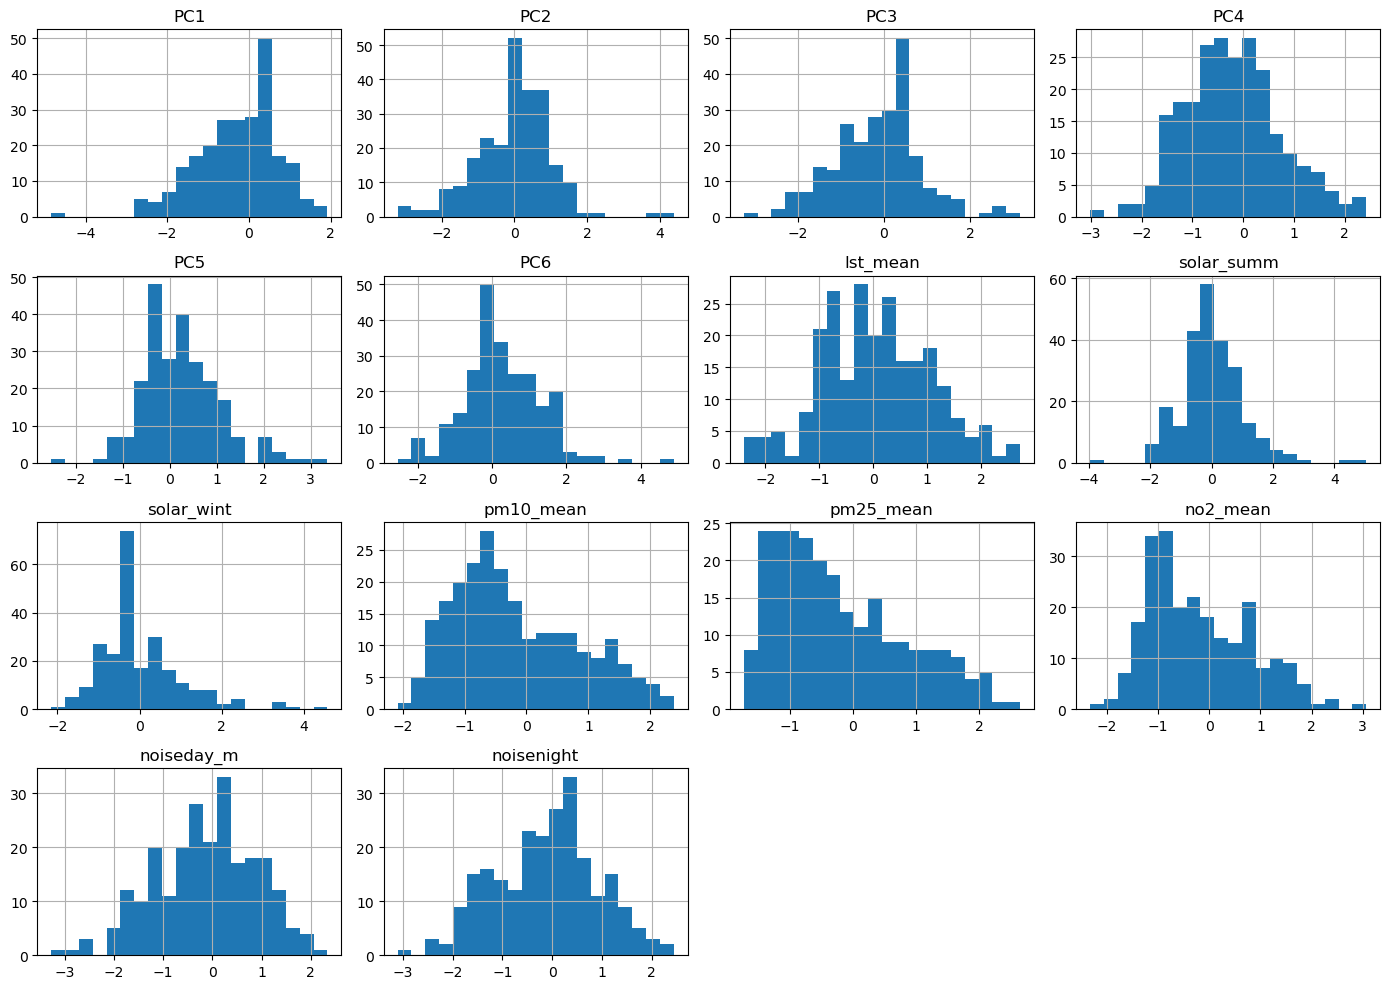

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# compact overview using histograms and Kernel Density Estimations (KDE)


morph_cols = [c for c in df.columns if c.startswith("PC")]
env_cols = [
    "lst_mean",
    "solar_summ",
    "solar_wint",
    "pm10_mean",
    "pm25_mean",
    "no2_mean",
    "noiseday_m",
    "noisenight",
]

plt.figure(figsize=(12, 8))
df[morph_cols + env_cols].hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()

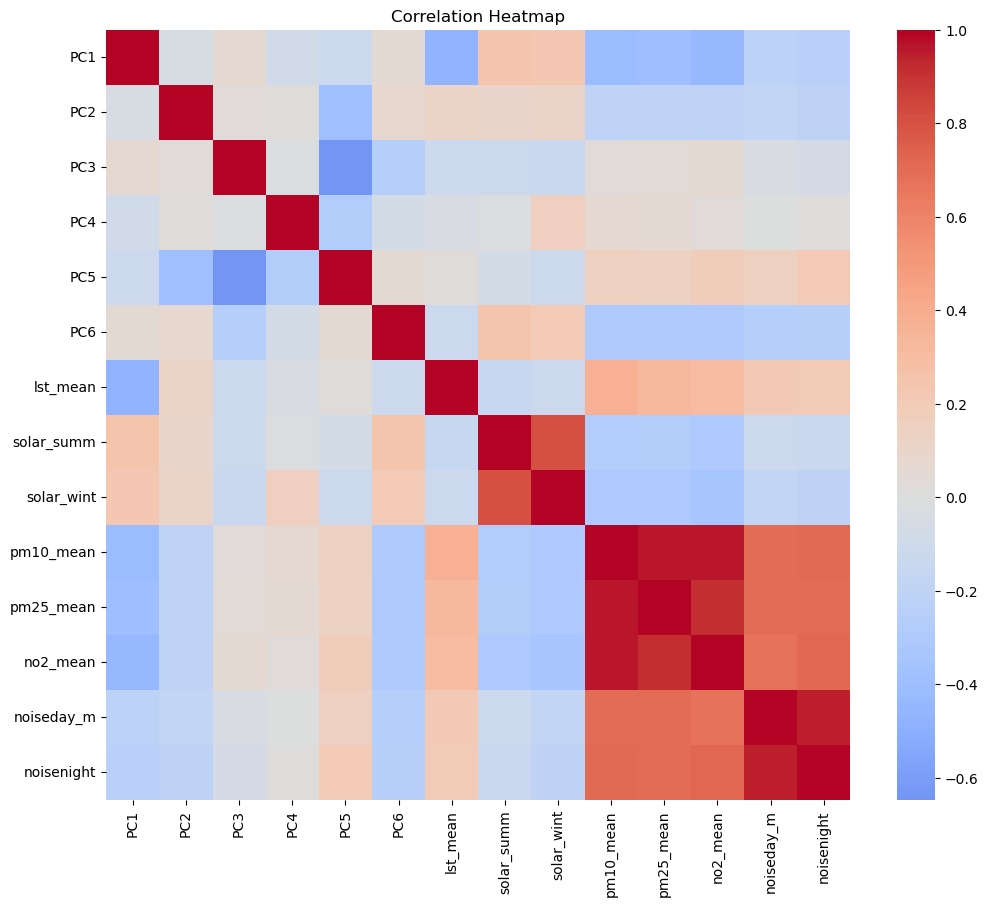

In [14]:
# correlation matrix, correlation between PCs serves as check for
# proper PCA execution and meaningfulness


plt.figure(figsize=(12, 10))
sns.heatmap(df[morph_cols + env_cols].corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

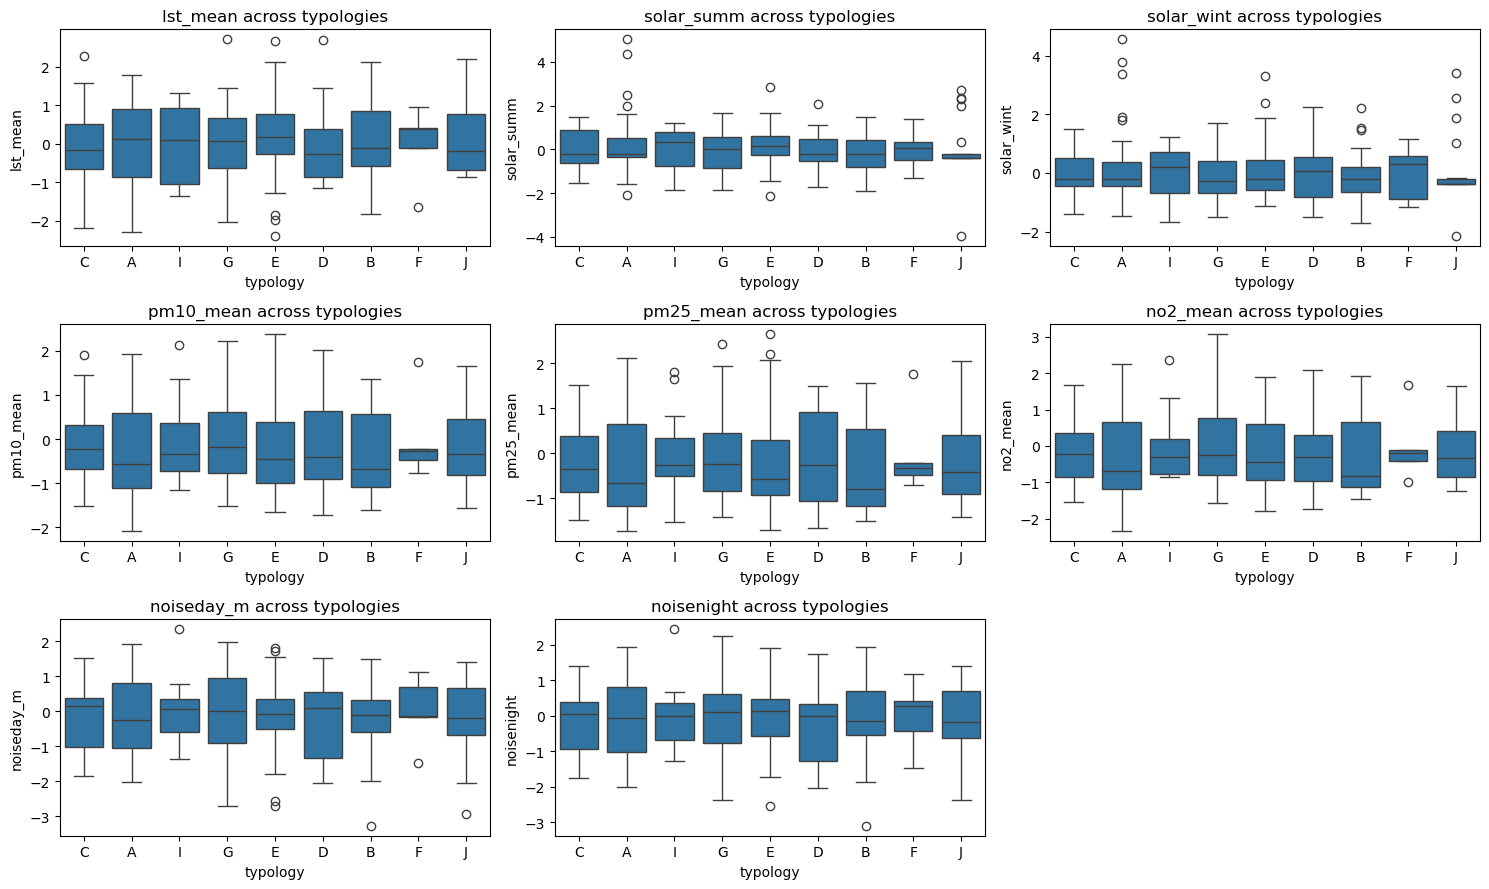

In [15]:
# Typology effects (categories derived from morphological PC-based clustering,
# raw data we have no access to). Do different typologies have different exposure?

# arrange the env feature boxplots into a single grid of subplots
n = len(env_cols)
cols = min(3, n)
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 3), squeeze=False)
axes_flat = axes.flatten()

for ax, var in zip(axes_flat, env_cols):
    sns.boxplot(data=df, x="typology", y=var, ax=ax)
    ax.set_title(f"{var} across typologies")
    plt.xticks(rotation=45)

# remove any unused axes (if n < rows*cols)
for ax in axes_flat[len(env_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

In [16]:
# PCA structure check - correlations should be close to zero
df[morph_cols].corr()

,PC1,PC2,PC3,PC4,PC5,PC6
PC1,1.000000,-0.048286,0.066929,-0.090662,-0.129159,0.052013
PC2,-0.048286,1.000000,0.026513,0.016082,-0.394689,0.076820
PC3,0.066929,0.026513,1.000000,-0.019652,-0.646967,-0.256911
PC4,-0.090662,0.016082,-0.019652,1.000000,-0.274261,-0.070849
PC5,-0.129159,-0.394689,-0.646967,-0.274261,1.000000,0.049985
PC6,0.052013,0.076820,-0.256911,-0.070849,0.049985,1.000000


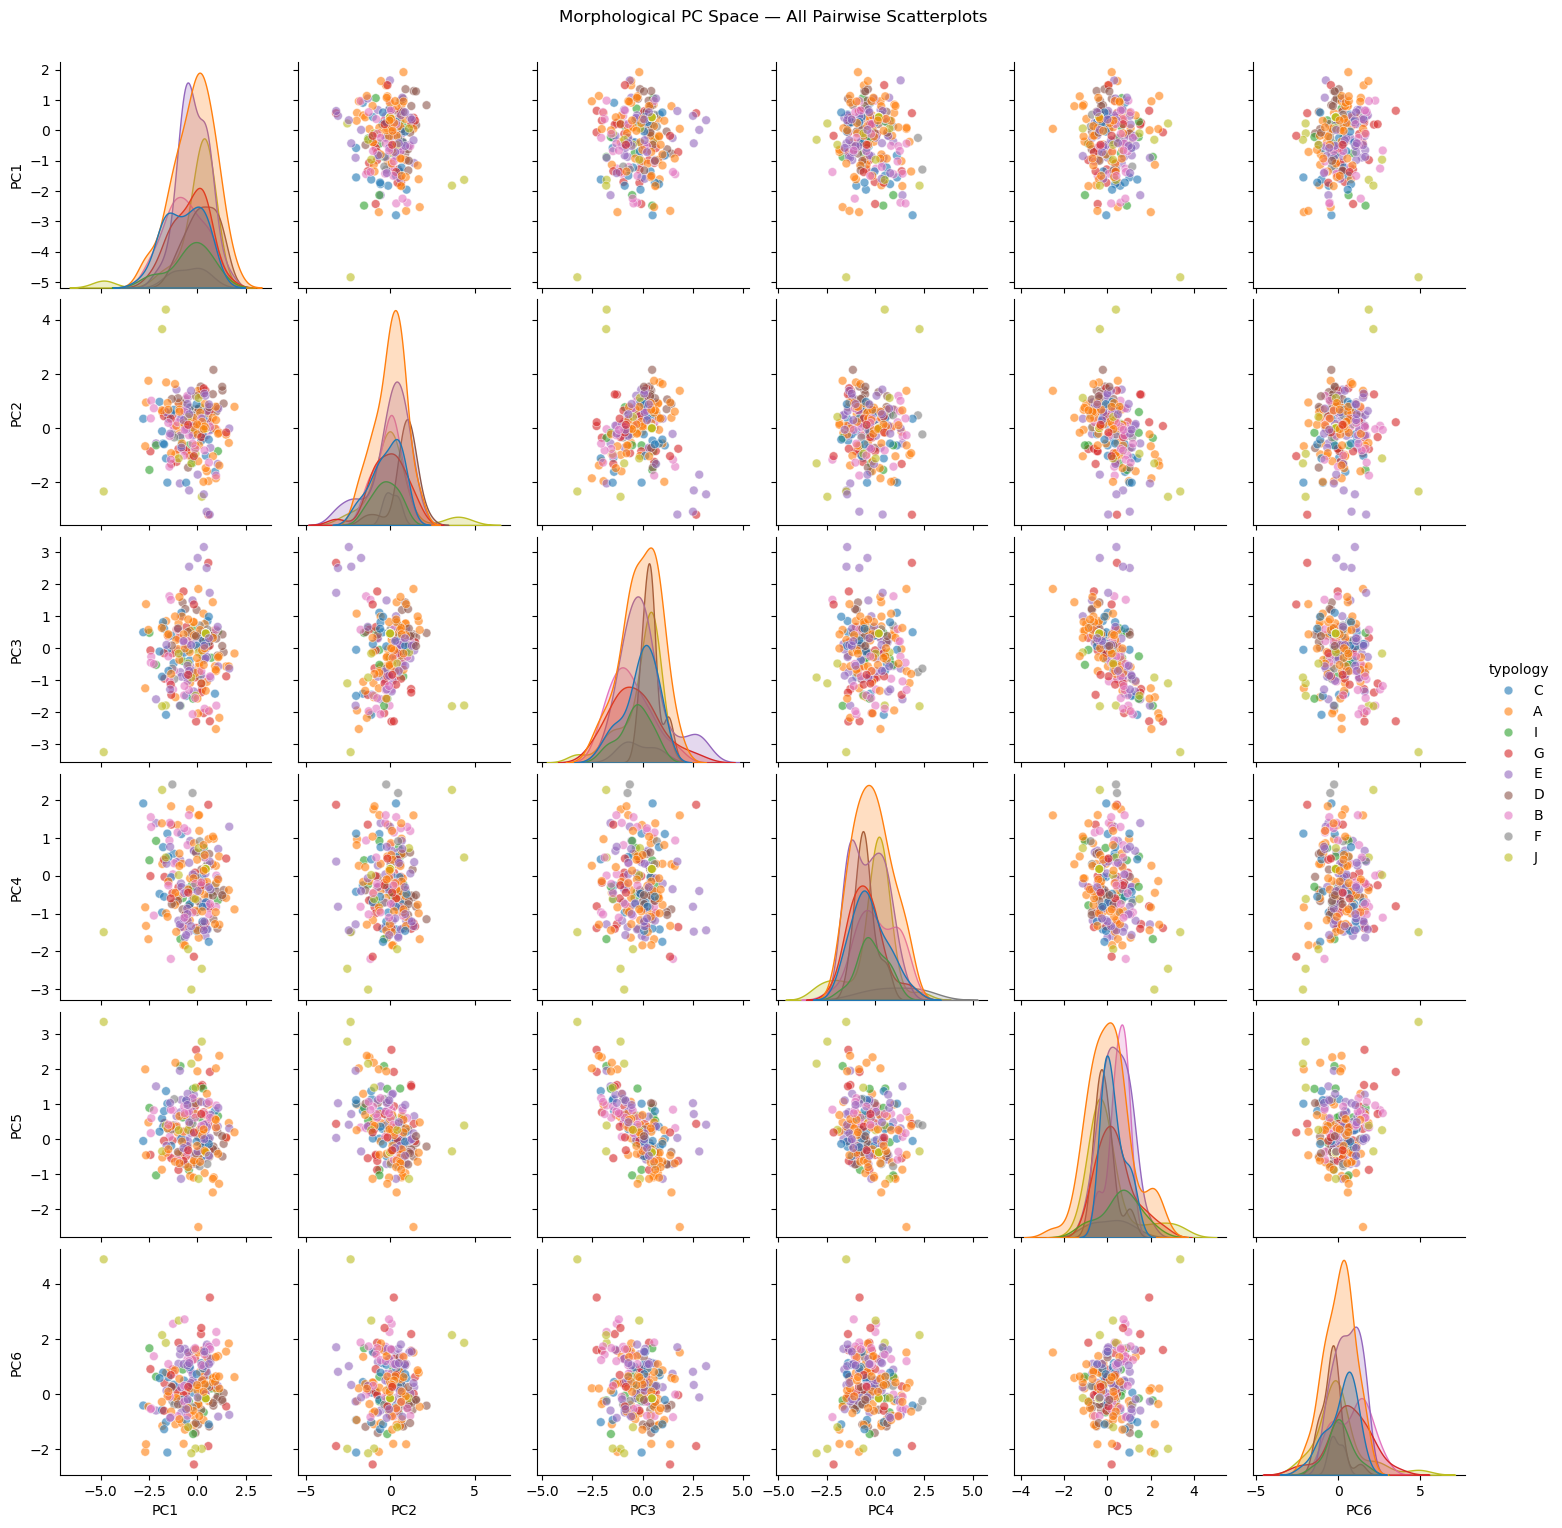

In [17]:
# all PC pairs in a grid
sns.pairplot(df, vars=morph_cols, hue="typology", plot_kws={"alpha": 0.6, "s": 40})
plt.suptitle("Morphological PC Space — All Pairwise Scatterplots", y=1.02)
plt.show()

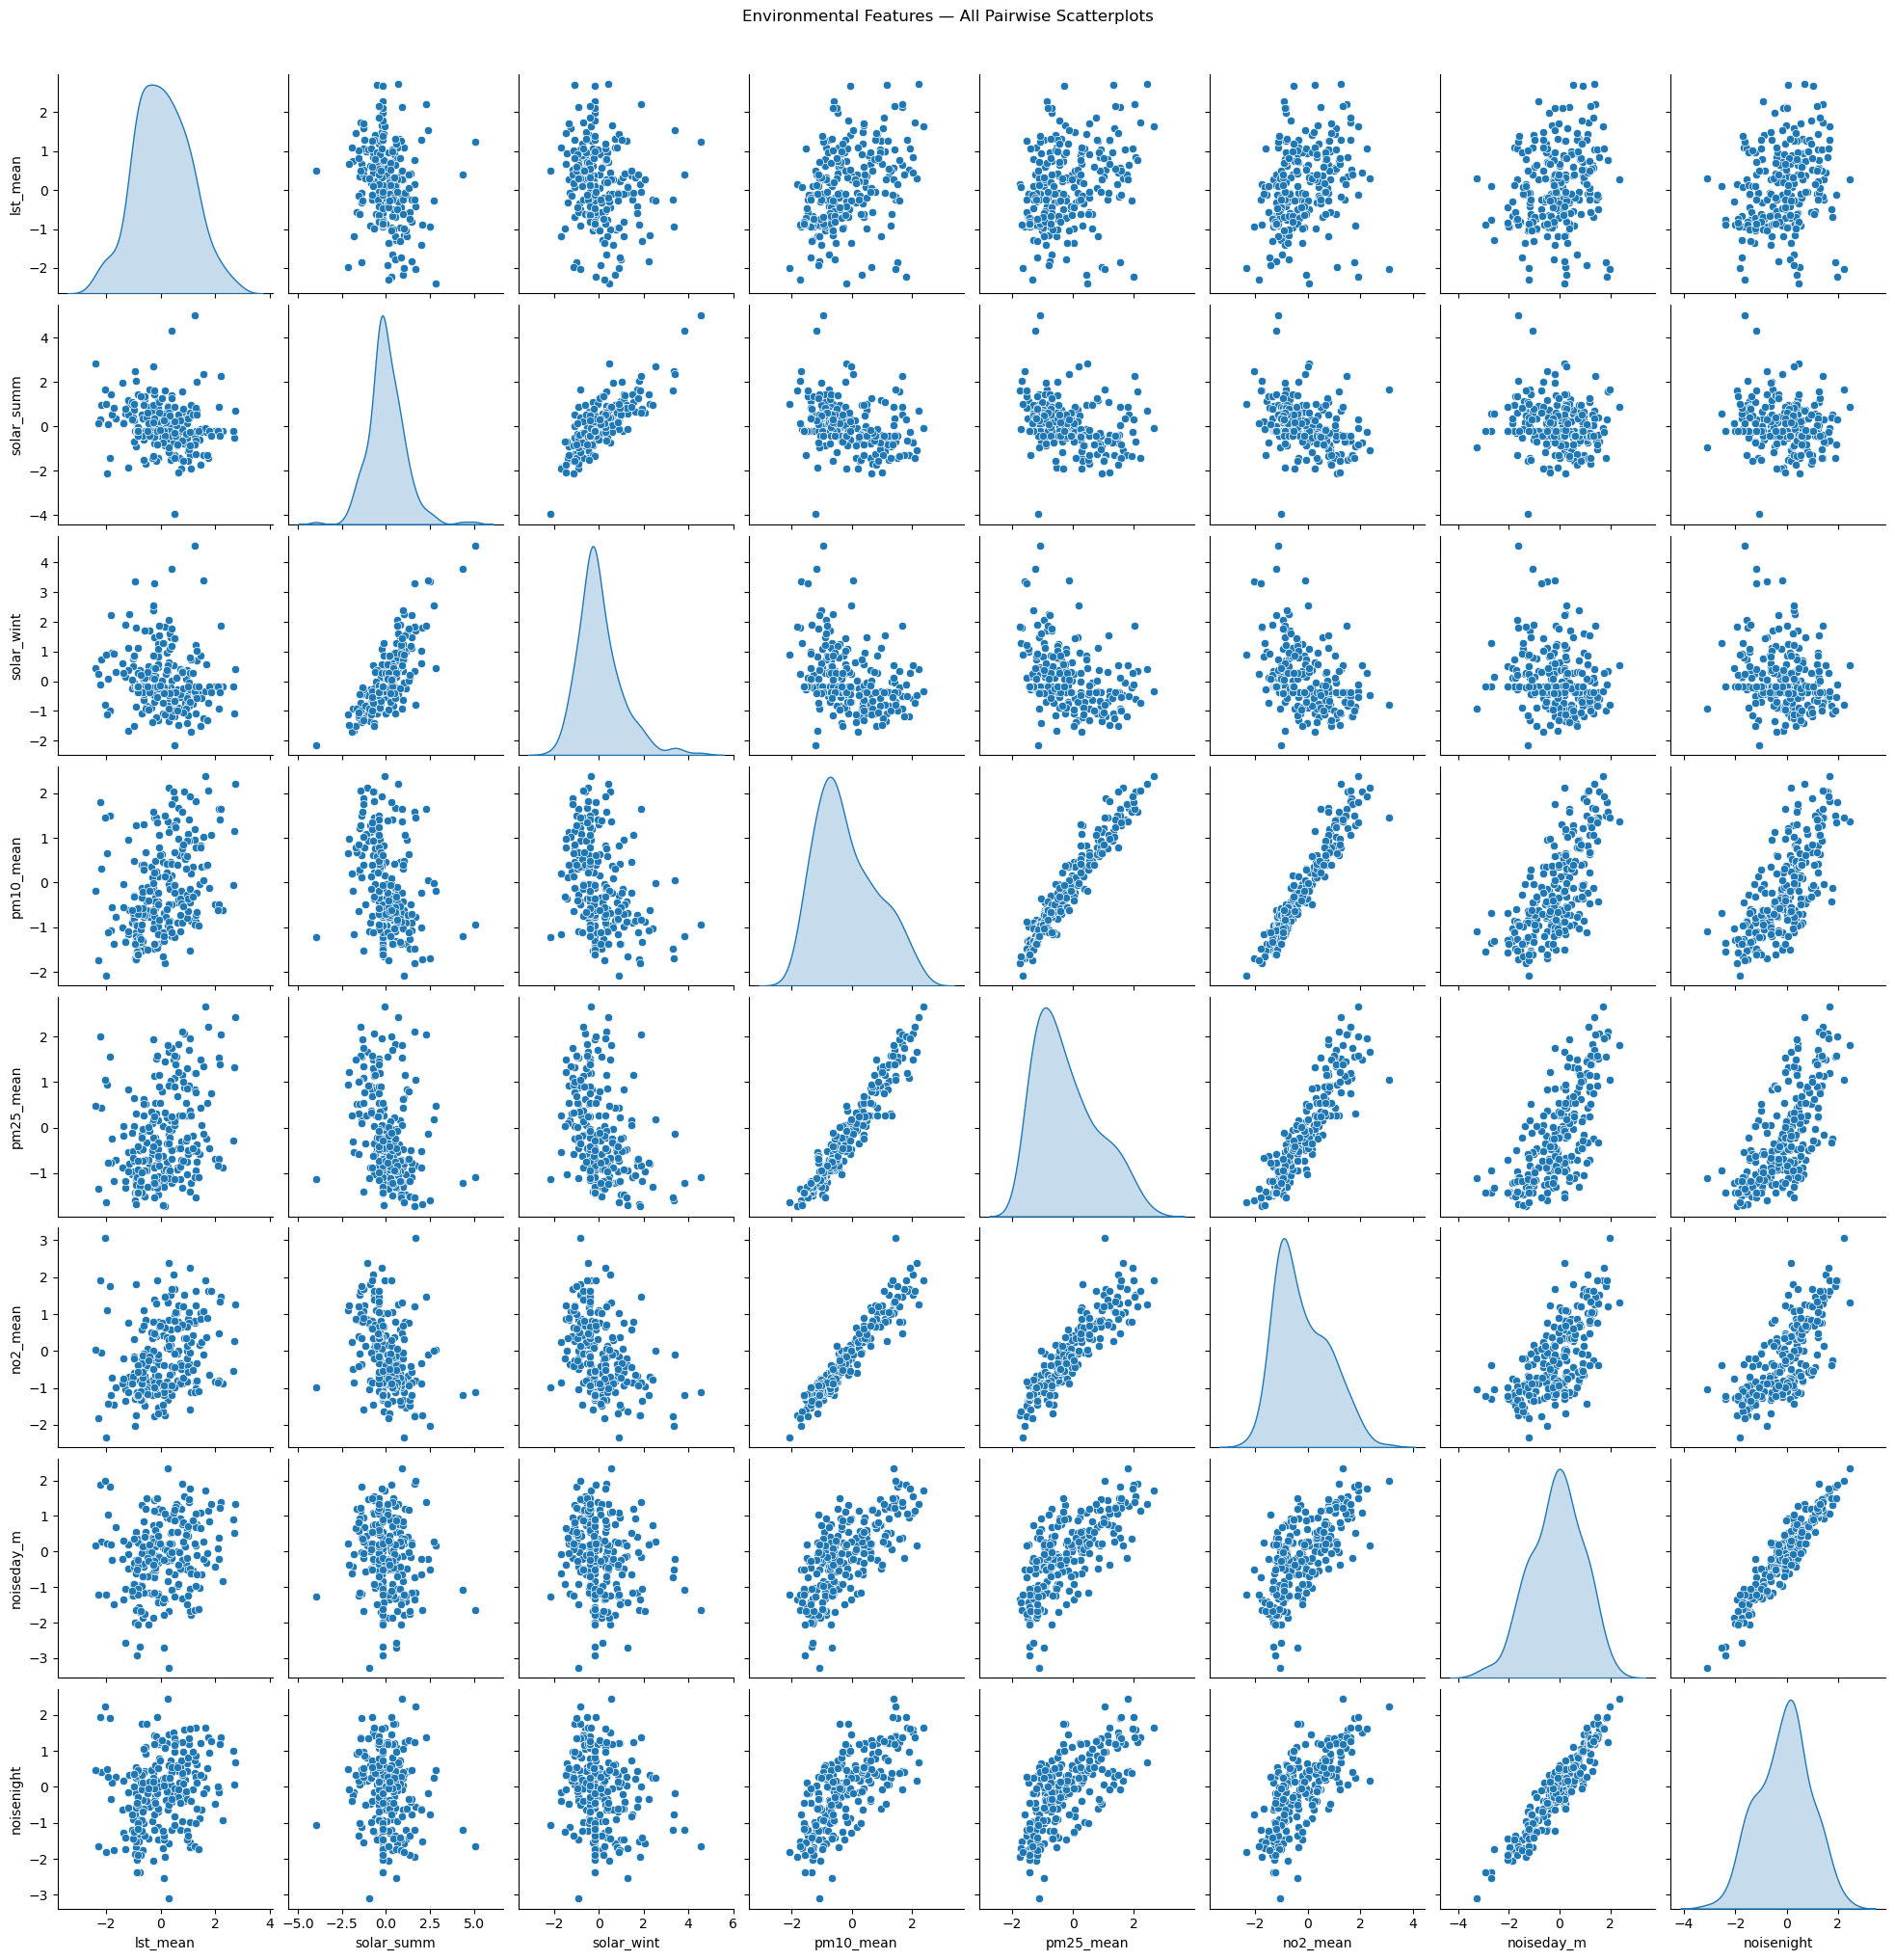

In [18]:
# pairplot for compact visual overview to show all pairwise scatter plots, maybe catch nonlinear relations
sns.pairplot(df[env_cols], diag_kind="kde")
plt.suptitle("Environmental Features — All Pairwise Scatterplots", y=1.02)
plt.show()